# Практика: Линейная регрессия
## Цель работы

Познакомиться с основными понятиями задачи регрессии и метода градиентного спуска.

# Структура работы

1. Загрузка данных из текстовых файлов
    1. Код для загрузки данных
    2. Пояснения о формате данных и их обработке
2. Создание и построение модели парной линейной регрессии
    1. Реализация класса модели
    2. Обучение модели с помощью градиентного спуска
3. Оценка качества модели на графике
    1. Построение графика с данными и линией регрессии
    2. Анализ результатов
4. Построение кривых обучения
    1. График изменения ошибки в процессе обучения
    2. Интерпретация кривой
5. Задания для самостоятельного выполнения
    1. Выполнение всех 7 заданий с кодом и пояснениями
6. Контрольные вопросы
    1. Ответы на все 6 вопросов с примерами и объяснениями


# 1. Загрузка данных из текстовых файлов
Для начала импортируем необходимые библиотеки и загрузим данные из предоставленных CSV-файлов.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

print(x.head())
print(y.head())
print(x.shape, y.shape)

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64
0    101.159902
1     78.442913
2   -159.238195
3    120.719533
4      2.920673
Name: 0, dtype: float64
(20,) (20,)


# Пояснение:

1. index_col=0 убирает лишний столбец с номерами строк, который появляется при стандартном чтении.
2. ["0"] извлекает нужный столбец с данными, преобразуя DataFrame в Series, как требуется для дальнейшей работы.
3. x и y — это одномерные массивы (Series) по 20 элементов каждый, что подтверждает корректность загрузки.

Теперь визуализируем данные, чтобы убедиться в наличии линейной зависимости:

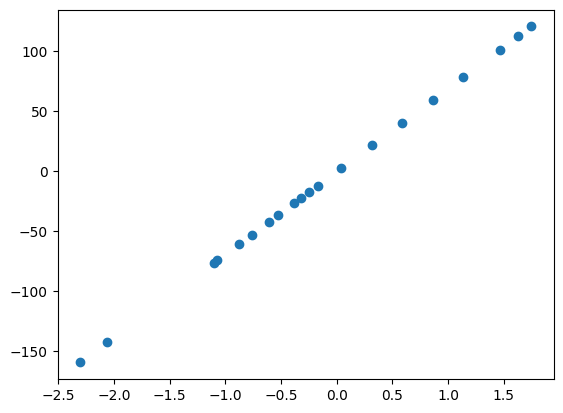

In [2]:
plt.figure()
plt.scatter(x, y)
plt.show()

# Вывод:

1. plt.scatter(x, y) строит диаграмму рассеяния, где каждая точка — это пара значений (x, y).
2. Мы видим линейную зависимость, что подтверждает возможность использования парной линейной регрессии.

# 2. Создание и построение модели парной линейной регрессии
Создадим класс Model для парной линейной регрессии с использованием градиентного спуска. Модель будет иметь вид 
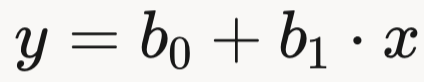

In [3]:
class Model(object):
    """Модель парной линейной регрессии y = b0 + b1 * x"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, x):
        return self.b0 + self.b1 * x
        
    def error(self, x, y):
        """J = y_pred - y_true"""
        return sum((self.predict(x) - y)**2) / (2 * len(y))
        
    def fit(self, x, y):
        alpha = 0.1
        for _ in range(100):
            dJ0 = sum(self.predict(x) - y) / len(x)
            dJ1 = sum((self.predict(x) - y) * x) / len(x)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
model = Model()
print("Начальная ошибка:", model.error(x, y))
model.fit(x, y)
print("Конечная ошибка:", model.error(x, y))

Начальная ошибка: 2937.6446095153397
Конечная ошибка: 1.0907539423957476e-06


# Пояснение:

1. Метод __init__ инициализирует параметры b0 и b1 нулями.
2. Метод predict вычисляет предсказанные значения по формуле линейной регрессии.
3. Метод error вычисляет среднеквадратичную ошибку, деленную на 2.
4. fit: Реализует градиентный спуск с фиксированной скоростью обучения alpha = 0.1 и 100 итерациями.
5. Начальная ошибка большая, так как b0 и b1 равны 0.
6. После 100 итераций градиентного спуска ошибка значительно уменьшилась, что указывает на успешное обучение.

# 3. Оценка качества модели на графике
Построим график с исходными данными и линией регрессии:

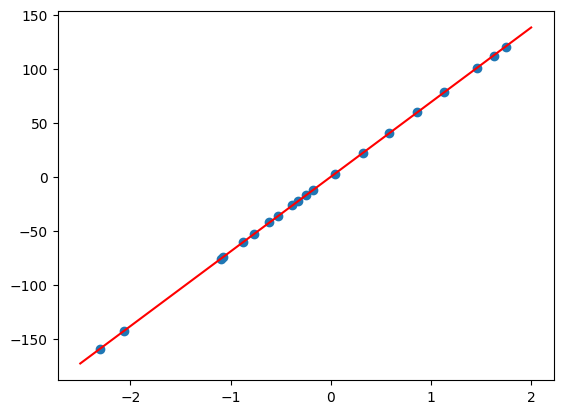

In [4]:
plt.figure()
plt.scatter(x, y)
x_pred = np.linspace(-2.5, 2, 100)
y_pred = model.predict(x_pred)
plt.plot(x_pred, y_pred, 'r')
plt.show()

## Анализ:

1. np.linspace(-2.5, 2, 100) создаёт 100 равномерно распределённых точек для построения гладкой линии.
2. model.predict(x_pred) вычисляет предсказанные значения y.
3. Красная линия ('r') показывает, как модель аппроксимирует данные. Линия проходит близко к точкам, что подтверждает хорошее качество модели.

# 4. Построение кривых обучения
1. Кривые обучения показывают, как ошибка меняется в процессе градиентного спуска
2. Модифицируем класс, чтобы собирать ошибки на каждой итерации

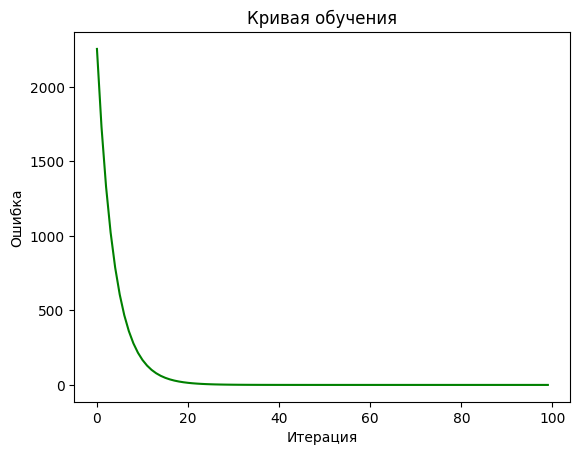

In [5]:
class Model(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, x):
        return self.b0 + self.b1 * x
        
    def error(self, x, y):
        return sum((self.predict(x) - y)**2) / (2 * len(y))
        
    def fit(self, x, y):
        alpha = 0.1
        errors = []
        for _ in range(100):
            dJ0 = sum(self.predict(x) - y) / len(x)
            dJ1 = sum((self.predict(x) - y) * x) / len(x)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            errors.append(self.error(x, y))
        return errors

model = Model()
errors = model.fit(x, y)
plt.plot(errors, 'g')
plt.xlabel('Итерация')
plt.ylabel('Ошибка')
plt.title('Кривая обучения')
plt.show()

# Интерпретация:

1. График показывает, что ошибка быстро уменьшается на первых итерациях и затем выходит на плато.
2. Это означает, что модель достигла локального оптимума, и дальнейшие итерации не дают значительного улучшения.